In [299]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

In [300]:
X, y = make_classification(
    n_samples=10,  # Number of samples
    n_features=2,   # Number of features for 2D visualization
    n_classes=2,    # Binary classification
    n_informative=2,  # Number of informative features
    n_redundant=0,    # No redundant features
    n_clusters_per_class=1,  # One cluster per class
    random_state=42
)

In [301]:
colors = np.array(["Red", "Green"])
color_map = colors[y]

In [302]:
print(X)

[[ 0.34881901 -1.80671372]
 [-0.36310016 -1.1075354 ]
 [ 1.40927009 -0.80772746]
 [ 1.63183215  1.11812006]
 [-0.87712912  2.71639998]
 [ 0.33041864  2.03325186]
 [-0.16848726  1.51164804]
 [ 1.94952901  0.5087877 ]
 [ 1.20571936 -0.90263054]
 [ 0.49447882 -0.61772816]]


In [303]:
print(y)

[0 0 0 1 1 1 1 1 0 0]


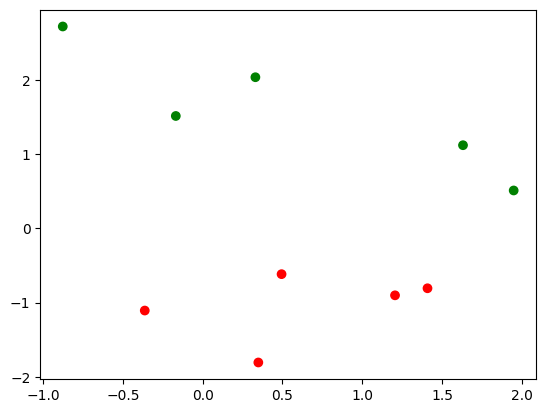

In [304]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color=color_map)
plt.show()

In [305]:
from sklearn.linear_model import LogisticRegression

In [306]:
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression()

In [307]:
print(reg.coef_)

[[0.26174628 1.47919584]]


In [308]:
print(reg.intercept_)

[-0.49777088]


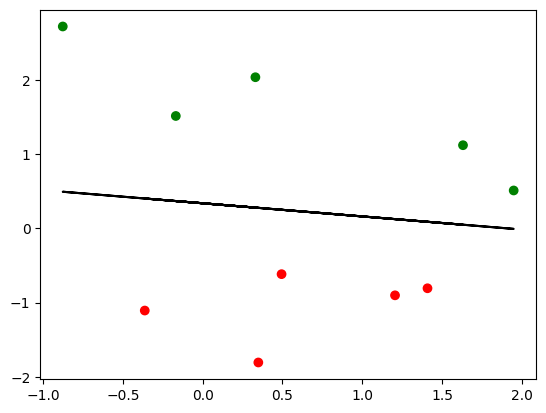

In [309]:
plt.scatter(X[:, 0], X[:, 1], color=color_map)
plt.plot(X[:, 0], (-reg.intercept_ - reg.coef_[0][0] * X[:, 0]) / reg.coef_[0][1], color='black')
plt.show()

In [310]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.dot(X, reg.coef_.T) + reg.intercept_
g = sigmoid(z)

In [311]:
print(g)

[[0.04398385]
 [0.09699464]
 [0.21020556]
 [0.82966765]
 [0.96410947]
 [0.9306226 ]
 [0.84476937]
 [0.68246165]
 [0.17985272]
 [0.21719572]]


In [312]:
g1 = g * (1 - g)

In [313]:
print(g1)

[[0.04204927]
 [0.08758668]
 [0.16601918]
 [0.14131924]
 [0.0346024 ]
 [0.06456418]
 [0.13113408]
 [0.21670775]
 [0.14750572]
 [0.17002174]]


In [314]:
w = reg.coef_
#h = np.dot(X, w.T) + reg.intercept_

In [315]:
#print(h)

In [316]:
#z1 = sigmoid(h)

In [317]:
#print(z1)

In [318]:
#J = -np.sum(y * np.log(z1) + (1 - y) * np.log(1 - z1)) / len(X)

In [319]:
#print(J)

In [320]:
lr = 0.0001
epochs = 1000

for epoch in range(epochs):
    h = np.dot(X, w.T) + reg.intercept_
    
    z1 = sigmoid(h)
    
    w = w - lr * (np.dot(X.T, (z1 - y.reshape(-1, 1))) / len(X)).T

print(w)

[[0.2643387  1.49386355]]


In [321]:
#print(w)

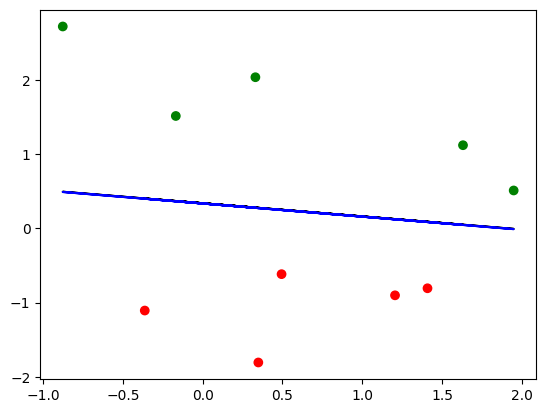

In [322]:
plt.scatter(X[:, 0], X[:, 1], color=color_map)
plt.plot(X[:, 0], (-reg.intercept_ - reg.coef_[0][0] * X[:, 0]) / reg.coef_[0][1], color='black')
plt.plot(X[:, 0], (-reg.intercept_ - w[0][0] * X[:, 0]) / w[0][1], color='blue')
plt.show()